<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home work for module 9 by
# Кравченко Сергій

In [140]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [141]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [142]:
X_train.shape

(60000, 28, 28)

In [143]:
X_test.shape

(10000, 28, 28)

In [144]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [177]:
model = Sequential()

# first trial
# model.add(Dense(64, activation='relu', input_shape=[784,], name = 'Layer_1'))
# model.add(Dropout(0,2))
# model.add(Dense(64, activation='relu', name = 'Layer_2'))
# model.add(Dropout(0,2))
# model.add(Dense(10, activation='softmax', name = 'Layer_out'))

model.add(Dense(128, activation='relu', input_shape=[784,], name = 'Layer_1'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', name = 'Layer_2'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', name = 'Layer_3'))
model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', name = 'Layer_4'))
# # model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax', name = 'Layer_out'))

In [178]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [179]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 Layer_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 Layer_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 Layer_out (Dense)           (None, 10)               

In [180]:
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/40
235/235 [==============================] - 4s 11ms/step - loss: 0.8432 - accuracy: 0.7018 - val_loss: 0.5164 - val_accuracy: 0.8118
Epoch 2/40
235/235 [==============================] - 2s 10ms/step - loss: 0.5003 - accuracy: 0.8231 - val_loss: 0.4210 - val_accuracy: 0.8474
Epoch 3/40
235/235 [==============================] - 4s 15ms/step - loss: 0.4384 - accuracy: 0.8472 - val_loss: 0.4005 - val_accuracy: 0.8567
Epoch 4/40
235/235 [==============================] - 2s 10ms/step - loss: 0.4066 - accuracy: 0.8564 - val_loss: 0.3797 - val_accuracy: 0.8627
Epoch 5/40
235/235 [==============================] - 2s 10ms/step - loss: 0.3908 - accuracy: 0.8607 - val_loss: 0.3667 - val_accuracy: 0.8711
Epoch 6/40
235/235 [==============================] - 2s 10ms/step - loss: 0.3704 - accuracy: 0.8686 - val_loss: 0.3628 - val_accuracy: 0.8704
Epoch 7/40
235/235 [==============================] - 3s 11ms/step - loss: 0.3573 - accuracy: 0.8720 - val_loss: 0.3593 - val_accuracy: 0.8684

In [181]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8910


[0.31742337346076965, 0.890999972820282]

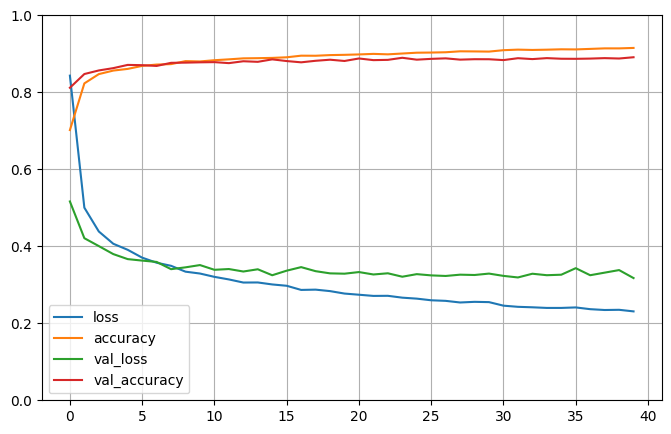

In [182]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 [==============================] - 0s 73ms/step


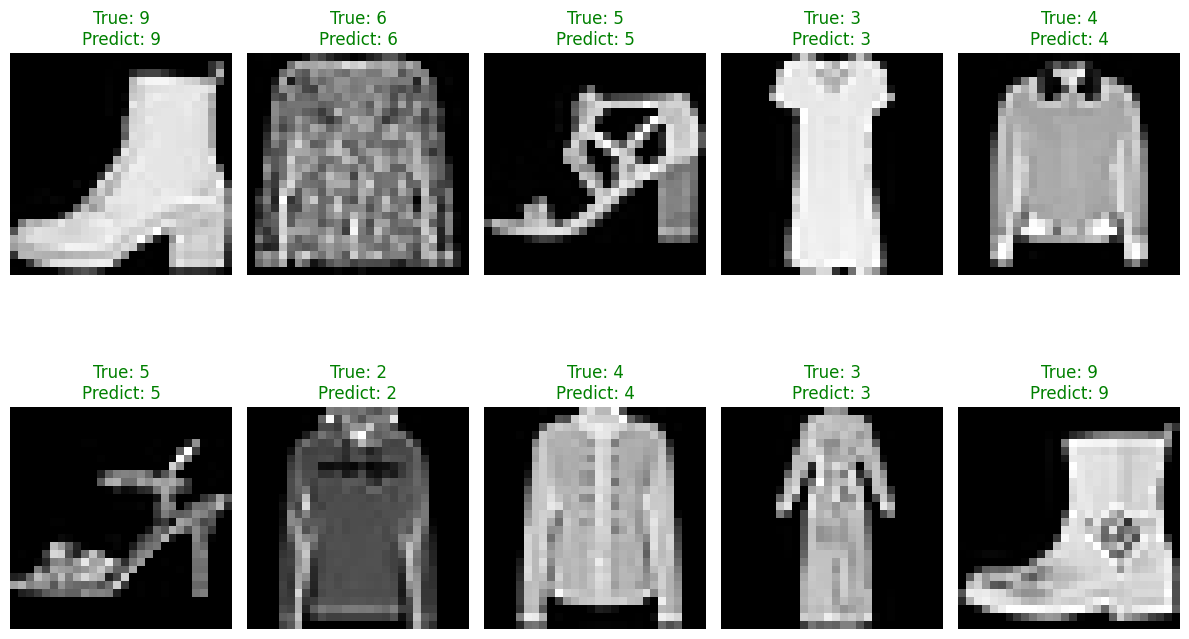

In [183]:
import random

images_count = 10
random_indices = np.random.choice(range(len(X_test)), size=images_count, replace=False)

test_image = X_test[random_indices]
test_values = y_test[random_indices]


predict = model.predict(test_image)
predict_values = np.argmax(predict, axis=1)

plt.figure(figsize=(12, 8))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title("True: %s\nPredict: %s" % (test_values[i], predict_values[i]), color=("green" if predict_values[i] == test_values[i] else "red"))
    plt.axis('off')

plt.tight_layout()
plt.show()

# Для виконання завдання:

Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Для автоматизації процесу можна скористатися keras-tuner (приклад нижче)

In [131]:
! pip install keras-tuner

In [137]:
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch


# Функція для створення та компіляції моделі
def build_model(hp):
    model = keras.Sequential()
    # model.add(layers.Flatten(input_shape=(28, 28)))
    # model_1.add(input_shape=[784,])

    # Перебираємо параметри кількості шарів та нейронів
    for i in range(hp.Int('num_layers', 1, 5)):  # От 1 до 5 слоев
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 128, 32), activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Перебираємо оптимізатори
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Завантажуємо дані
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Створюємо об'єкт для пошуку найкращої моделі
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Кількість ітерацій для пошуку
    directory='my_dir_1',  # Шлях до папки для збереження результатів
    project_name='mnist_model_search'
)

# Запускаємо пошук найкращої моделі
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Отримуємо найкращу модель та результати пошуку
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Створимо список для параметрів шарів
layers_config = [f"Layer_{i+1}: {best_hyperparameters.get('units_' + str(i))} units" for i in range(best_hyperparameters.get('num_layers'))]

# Виводимо результати
results = pd.DataFrame({
    'Model Configuration': [', '.join(layers_config)],
    'Optimizer': [best_hyperparameters.get('optimizer')],
    'Validation Accuracy': [best_model.evaluate(X_test, y_test, verbose=0)[1]]
})

print(results)

Trial 10 Complete [00h 01m 24s]
val_accuracy: 0.8773000240325928

Best val_accuracy So Far: 0.8774999976158142
Total elapsed time: 00h 16m 11s
                                 Model Configuration Optimizer  \
0  Layer_1: 96 units, Layer_2: 32 units, Layer_3:...      adam   

   Validation Accuracy  
0               0.8775  


In [138]:
best_model.summary()
# найкраща модель

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                75360     
                                                                 
 dense_1 (Dense)             (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 80,906
Trainable params: 80,906
Non-trainable params: 0
_________________________________________________________________


In [139]:
tuner.results_summary()
# результати пошуку

Results summary
Results in my_dir_1/mnist_model_search
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 4
units_0: 96
optimizer: adam
units_1: 32
units_2: 32
units_3: 32
Score: 0.8774999976158142

Trial 06 summary
Hyperparameters:
num_layers: 2
units_0: 128
optimizer: rmsprop
units_1: 64
units_2: 128
units_3: 96
units_4: 96
Score: 0.8774999976158142

Trial 09 summary
Hyperparameters:
num_layers: 4
units_0: 64
optimizer: adam
units_1: 32
units_2: 96
units_3: 128
units_4: 32
Score: 0.8773000240325928

Trial 03 summary
Hyperparameters:
num_layers: 1
units_0: 64
optimizer: rmsprop
units_1: 64
units_2: 128
units_3: 64
units_4: 32
Score: 0.8769000172615051

Trial 00 summary
Hyperparameters:
num_layers: 2
units_0: 128
optimizer: rmsprop
units_1: 32
Score: 0.8752999901771545

Trial 05 summary
Hyperparameters:
num_layers: 3
units_0: 32
optimizer: rmsprop
units_1: 96
units_2: 32
units_3: 64
units_4: 32
Score: 0.8712000250816345

Для досягнення високих результатів потрібен досвід та час. Напрямок маємо, завзятість теж. Не зупиняймося. Але це вже інша історія.